# Практическое задание 1

На примере анализа и перепроектировании модели визуализации рассмотрим инфографику, представленную в отчёте Программы международной оценки (Pisa) за 2012 год. Данная инфографика, представлена на рисунке 1. Она показывает результаты прохождения детьми 15-ти лет из различных стран и регионов тестов по математике, навыкам чтения и естественным наукам. 

<center>
<img src="./initial.png" />

Рисунок 1. Результаты Pisa 2012 - как соотносятся результаты по странам и предметам
</center>

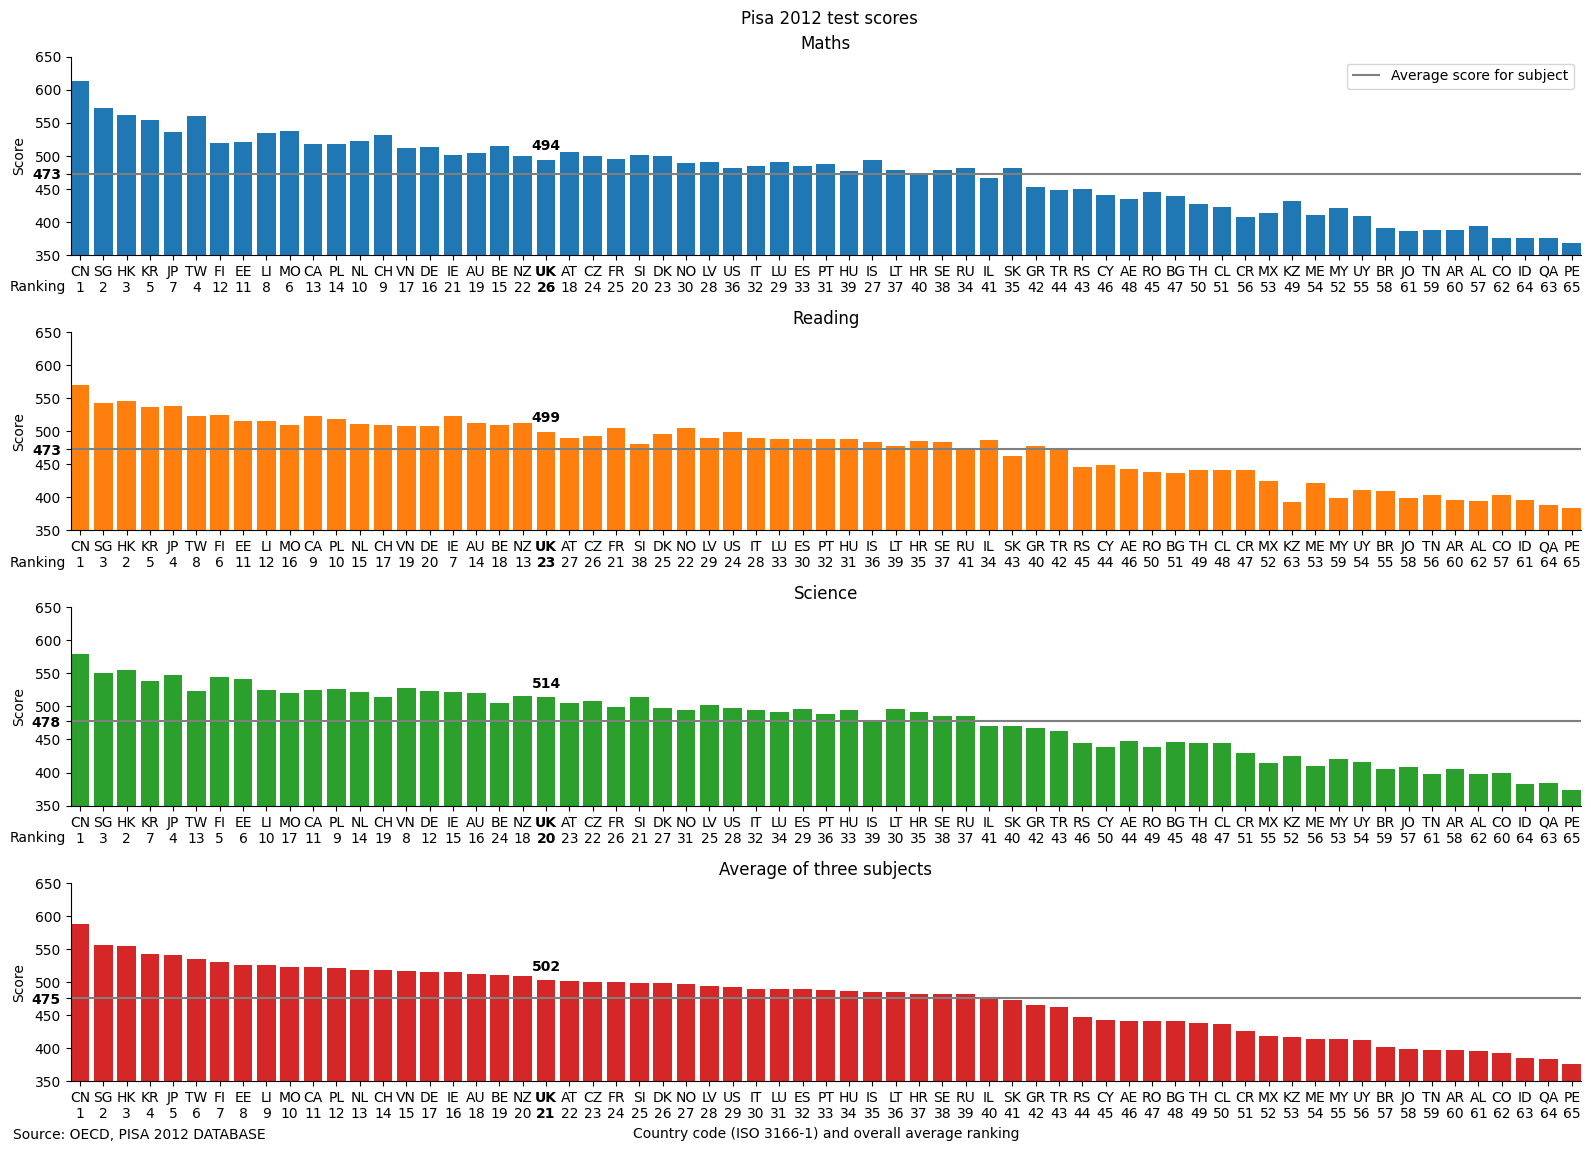

In [57]:
%reset -f

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

subjects = ["Maths", "Reading", "Science"]

data = pd.read_csv("./practice1.csv", names=["country", *subjects])

country_codes = pd.read_csv("./country_codes.csv", names=["country", "code"])

data = data.merge(country_codes, how="outer", on="country")

data = data.dropna(subset=subjects)

data["Average of three subjects"] = data.loc[:, subjects].mean(axis=1)

data = data.sort_values(by="Average of three subjects", ascending=False, ignore_index=True)

data.to_csv("res.csv", index=False, header=False)

if data[data["code"].isna()].size != 0:
    raise ValueError("NaN country code")

fig, ax = plt.subplots(nrows=4)

fig.set_size_inches(16, 11.69)

# colors=("#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073B4C")

colors=("tab:blue", "tab:orange", "tab:green", "tab:red", "tab:grey")

for i, subj in enumerate((*subjects, "Average of three subjects")):
    sdata = data.sort_values(by=subj, ascending=False, ignore_index=True)
    positions = np.array([str(sdata[sdata["code"] == code].index[0]+1) for code in data["code"]])

    x = data["code"] + "\n" + positions

    bar = ax[i].bar(x, data[subj], color=colors[i])

    bar_labels = list(map(lambda j: str(int(data[subj][data.index[j]])) if data["code"][data.index[j]] == "UK" else "", range(len(data.index))))

    ax[i].bar_label(bar, labels=bar_labels, weight="bold", padding=5)

    ax[i].set_title(subj)

    ax[i].set_ylabel("Score")

    ax[i].autoscale(tight=True)

    ax[i].set_ylim(350)

    mean = int(data[subj].mean())

    ax[i].set_yticks(list(set((*ax[i].get_yticks(), mean, 650))))

    ax[i].xaxis.set_tick_params(labelbottom=True)

    for label in ax[i].get_xticklabels():
        if "UK" in label.get_text():
            label.set(fontweight="bold")

    for label in ax[i].get_yticklabels():
        if label.get_text() == str(mean):
            label.set(fontweight="bold")
            label.set_text(f"avg: {mean}")

    ax[i].hlines([mean], 0, 1, transform=ax[i].get_yaxis_transform(), color=colors[-1], label="Average score for subject")

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

ax[0].legend()
ax[-1].set_xlabel("Country code (ISO 3166-1) and overall average ranking")

fig.suptitle("Pisa 2012 test scores", x=0.52)
plt.figtext(0.01, 0.014, "Source: OECD, PISA 2012 DATABASE")

fig.tight_layout()

for i in range(3):
    ax[i].text(-3, 295, "Ranking")

In [ ]:
%reset -f

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

subjects = ["Maths", "Reading", "Science"]

data = pd.read_csv("./practice1.csv", names=["country", *subjects])

country_codes = pd.read_csv("./country_codes.csv", names=["country", "code"])

data = data.merge(country_codes, how="outer", on="country")

data = data.dropna(subset=subjects)

data["Average of three subjects"] = data.loc[:, subjects].mean(axis=1)

data = data.sort_values(by="Average of three subjects", ascending=False)

data.to_csv("res.csv", index=False, header=False)

if data[data["code"].isna()].size != 0:
    raise ValueError("NaN country code")

fig, ax = plt.subplots(ncols=4)

fig.set_size_inches(16, 11.69)

positions = np.array(list(map(str,range(1, len(data.index)+1))))

x = data["code"] + " " + positions

# colors=("#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073B4C")

colors=("tab:blue", "tab:orange", "tab:green", "tab:red", "tab:grey")

for i, subj in enumerate((*subjects, "Average of three subjects")):
    bar = ax[i].barh(x[::-1], data[subj][::-1], color=colors[i])

    bar_labels = list(map(lambda j: str(int(data[subj][data.index[j]])) if data["code"][data.index[j]] == "UK" else "", range(len(data.index))))

    ax[i].bar_label(bar, labels=bar_labels, weight="bold", padding=5)

    ax[i].set_title(subj)

    ax[i].set_ylabel("Country code (ISO 3166-1) and ranking")
    ax[i].set_xlabel("Score")

    ax[i].autoscale(tight=True)

    ax[i].set_xlim(350)

    mean = int(data[subj].mean())

    ax[i].set_xticks((*range(350, 650+1, 100), mean))

    for label in ax[i].get_yticklabels():
        if "UK" in label.get_text():
            label.set(fontweight="bold")

    for label in ax[i].get_xticklabels():
        if label.get_text() == str(mean):
            label.set(fontweight="bold")
            label.set_text(f"avg: {mean}")

    ax[i].vlines([mean], 0, 1, transform=ax[i].get_xaxis_transform(), color=colors[-1], label="Average score of this subject")

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

ax[0].legend()

fig.suptitle("Pisa 2012 test scores")
plt.figtext(0.01, 0, "Source: OECD, PISA 2012 DATABASE")

fig.tight_layout()

In [ ]:
indexes = (*range(5), *range(18, 23), *range(60, 65))
countries = [data["country"][data.index[i]] + '\n' + str(i+1) + ("st" if (i%10==0 and i!=10) else "nd" if (i%10==1 and i!=11) else "rd" if (i%10==2 and i!=12) else "th") for i in indexes]
tests = {subj: [data[subj][data.index[i]] for i in indexes] for subj in subjects}

fig, ax = plt.subplots(constrained_layout=True)

fig.set_size_inches(19, 5)

x = np.arange(len(countries))
width = 0.25

for i, subj in enumerate(subjects):
    offset= width*i
    bar = ax.bar(x+offset, tests[subj], width, label=subj)
    ax.bar_label(bar, padding=3)
    
    # ax.plot((0, x[-1]*width*4+width*2), [data[subj].mean()]*2, color=colors[i], linewidth=3, label=subj+" average")

ax.legend()

ax.set_title("Pisa 2012 test scores", pad=10)

ax.set_xticks(x+width, countries)
ax.set_xlabel("Country and its ranking sorted by average of three subjects")

for label in ax.get_xticklabels():
    if "UK" in label.get_text():
        label.set(fontweight="bold")

ax.autoscale(tight=True)
ax.set_ylim(350)

ax2 = ax.secondary_xaxis('top')
ax2.set_xticks(np.arange(3)*5+width*9, ["Top of the class", "UK", "Need to work"])
ax2.tick_params(top=False)
ax2.set_frame_on(False)

ax.get_yaxis().set_visible(False)
ax.spines[['left', 'top', 'right']].set_visible(False)

ax.vlines([i+width*3 for i in (4, 9)], 0, 1, transform=ax.get_xaxis_transform(), linestyles='dashed', colors='#b0b0b0', linewidth=0.5)

plt.figtext(0.013, 0, "Source: OECD, PISA 2012 DATABASE")

fig.tight_layout()